# 0. Combining plotting with live **streaming** data from a web server

You need to create modifications of `Session03-01-requests-json.ipynb` to:
* Get *streaming* data from a web server using the `GET` or `POST` HTTP methods.
* Automatically update plots *without a given time delay*
* Interleave *multiple* requests
* Handle *infinite* responses

## Preparation

A very simple **streaming** REST web server is provided for you in `Session04-02-streaming-json-http-server.ipynb`.
This implementation should not require any modification, but if you have problems, please ask for help.

Before continuing, open `Session04-02-streaming-json-http-server.ipynb` into another tab in `Jupyter Lab`, follow the instructions to install the needed `aiohttp` library (needed only once) and then *execute the notebook*.
It should only print `Server ready on http://127.0.0.1:8891` and wait doing nothing. This is *normal* since out server is just waiting to respond to requests, which we have not yet made.

The server should be running on `PORT` 8891. You can configure this port in `Session04-02-streaming-json-http-server.ipynb` by modifying the value of the `PORT` variable.
Make sure to use the same port in the requests as in the server.

## Context

This REST web server provides simple functionality related to generating *random integers* in a given *range*.

The API of the server is:

### 1. `GET` `/random_range` (identical to version in Session03)
Returns the current random integer *range* (should be \[1, 10\] by default).

The JSON response content is of the form:
```json
{
  'from_n': 1,
  'to_n': 10
}
```
but the values `1` and `10` may be different.

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_range'`


### 2. `GET` `/random_number`  (**additions** to version in Session03)
Returns a new generated random integer *number* each time.

The JSON response content is of the form:
```json
{
  'number': 7
}
```
but the value `7` may be different and should usually change from request to request.
There are two possible **query parameters**:

* `count` : (type: int), default=1000
  * How many random numbers should be returned in the *streaming* response
* `intervalms` : (type: int), default=-1
  * How many milliseconds to wait between returning streaming random numbers. Setting to `-1` means a random delay

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_number'`

### 3. `POST` `/random_range` (identical to version in Session03)
Takes a new random integer range as input, sets it to be used in future requests and returns the new current random integer *range*.

The JSON request *body* content is of the form:
```json
{
  'from_n': 5,
  'to_n': 100
}
```

The JSON response content is of the form:
```json
{
  'from_n': 5,
  'to_n': 100
}
```
but the values `5` and `100` may be different. Normally, the provided range as input should be the same as the one returned, but if an error has occurred the new range may not have been updated.
Check the response to make sure it is up-to-date.

With the default parameters the URL you need to provide to the `requests` library is of the form: `'http://127.0.0.1:8891/random_range'`

# 1. Problem steps *without plotting*

1. Make one `POST` request to set the random range to \[1, 10\].
2. Make one `GET` request to get the current range. Print the current range.
3. Make **one** `GET` request to get **20** random integers (each) in the \[1, 10\] range. Print the random integers one by one, as they come from the server.
4. Make one `POST` request to set the random range to \[41, 50\]. Check that these are the values returned also. In other words validate that the new range is indeed \[41, 50\].
5. Make **one** `GET` request to get **20** random integers (each) in the \[41, 50\] range. Print the random integers one by one, as they come from the server.

Hints / Pointers:
* Query parameters: https://docs.python-requests.org/en/master/user/quickstart/#passing-parameters-in-urls
* Streaming responses: https://docs.python-requests.org/en/master/user/advanced/?highlight=streaming%20response#streaming-requests



In [27]:
PORT = 8891

import requests
import json

# TODO: Complete here
url = f'http://127.0.0.1:{PORT}/random_range'
data = {
    'from_n': 1,
    'to_n': 10
}
response = requests.post(url, json=data)
if response.status_code == requests.codes.ok:
    jresponse = response.json()
    print(f"Random Range Set Request 0: Asked [{data['from_n']} - {data['to_n']}], Got: [{jresponse['from_n']} - {jresponse['to_n']}]")


url = f'http://127.0.0.1:{PORT}/random_range'
response = requests.get(url)
if response.status_code == requests.codes.ok:
    jresponse = response.json()
    print(f"Random Range Request 1: [{jresponse['from_n']} - {jresponse['to_n']}]")

 
url = f'http://127.0.0.1:{PORT}/random_number?count=20'
response = requests.get(url, stream=True)
g1 = 0
for line in response.iter_lines():
    if line:
        g1 += 1
        decoded_line = line.decode('utf-8')
        jresponse = json.loads(decoded_line)
        print(f"Random Number Request {g1}: {jresponse['number']}")


url = f'http://127.0.0.1:{PORT}/random_range'
data = {
    'from_n': 41,
    'to_n': 50
}
response = requests.post(url, json=data)
if response.status_code == requests.codes.ok:
    jresponse = response.json()
    print(f"Random Range Set Request 1: Asked [{data['from_n']} - {data['to_n']}], Got: [{jresponse['from_n']} - {jresponse['to_n']}]")


url = f'http://127.0.0.1:{PORT}/random_number?count=20'
response = requests.get(url, stream=True)
g2 = g1
for line in response.iter_lines():
    if line:
        g2 += 1
        decoded_line = line.decode('utf-8')
        jresponse = json.loads(decoded_line)
        print(f"Random Number Request {g2}: {jresponse['number']}")


Random Range Set Request 0: Asked [1 - 10], Got: [1 - 10]
Random Range Request 1: [1 - 10]
Random Number Request 1: 3
Random Number Request 2: 10
Random Number Request 3: 2
Random Number Request 4: 5
Random Number Request 5: 2
Random Number Request 6: 8
Random Number Request 7: 8
Random Number Request 8: 8
Random Number Request 9: 7
Random Number Request 10: 4
Random Number Request 11: 2
Random Number Request 12: 8
Random Number Request 13: 1
Random Number Request 14: 7
Random Number Request 15: 7
Random Number Request 16: 10
Random Number Request 17: 1
Random Number Request 18: 8
Random Number Request 19: 5
Random Number Request 20: 4
Random Range Set Request 1: Asked [41 - 50], Got: [41 - 50]
Random Number Request 21: 50
Random Number Request 22: 42
Random Number Request 23: 46
Random Number Request 24: 41
Random Number Request 25: 41
Random Number Request 26: 41
Random Number Request 27: 49
Random Number Request 28: 41
Random Number Request 29: 47
Random Number Request 30: 44
Random

# 2. Problem steps *with plotting*

This works similarly to before in 1.

1. Make one `POST` request to set the random range to \[1, 10\].
2. Make **one** `GET` request to get **20** random integers in the \[1, 10\] range.
  * In the for loop (NOT provided) plot the random numbers, with `x` being the incrementing order of the requesting number (0, 1, 2, ..., 19) and `y` being each time the corresponding generated random number.
4. Make one `POST` request to set the random range to \[41, 50\].
5. Make **one** `GET` request to get **20** random integers in the new range.
  * In the for loop (NOT provided) plot the random numbers, with `x` being the incrementing order of the requesting number (20, 21, 22, ..., 39) and `y` being each time the corresponding generated random number.

In the for loops, you should iterate over each response you get from the `GET /random_number` requests.

Create a simple line plot, but that **automatically updates** as every new value is generated.

NOTE: There is **no sleep delay now** in this part of the code as there was in the non-streaming version previously. 
The timing of the updates is controlled completely by the server!

Try **with** and **without** providing the `intervalms` parameter to the query. What happens with the update rate of the animation?

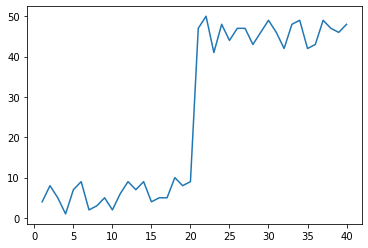

In [28]:
PORT = 8891

import requests
import json

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Completely remove this
def set_range(from_n, to_n):
    # Make a request to set the random range to [1, 50]
    url = f'http://127.0.0.1:{PORT}/random_range'
    data = {
        'from_n': from_n,
        'to_n': to_n
    }
    response = requests.post(url, json=data)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Random Range Set Request 1: Asked [{data['from_n']} - {data['to_n']}], Got: [{jresponse['from_n']} - {jresponse['to_n']}]")

# Provided partially implemented: 
def get_next_point():
    # TODO: make a request to get another random integer and return the value of the random number
    url = f'http://127.0.0.1:{PORT}/random_number'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Random Number Request {g1}: {jresponse['number']}")
        return jresponse['number']
    else:
        return None

# Provided already implemented: List holding the x values
data_x = []
# Provided already implemented: List holding the y values
data_y = []


# TODO: Set the range to [1, 10]
set_range(1, 10)

# Provided already implemented: make 20 iterations, getting a random number each time, and plotting a new plot with updated values.
url = f'http://127.0.0.1:{PORT}/random_number?count=20'
response = requests.get(url, stream=True)
x = 0
for line in response.iter_lines():
    if line:
        x += 1
        decoded_line = line.decode('utf-8')
        jresponse = json.loads(decoded_line)
        print(f"Random Number Request: {jresponse['number']}")
        data_x.append(x)  # Add the current x to the list
        y = jresponse['number'] # Request a new random value and store in y
        data_y.append(y) # Add the current y to the list

        clear_output(wait=True) # Clear / remove whatever was already plotted before
        plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
        plt.savefig(f"img_gen/Session04-01-requests-streaming-json-Section-2-{x:02}.png")
        plt.show() # Make sure to display the new plot, to make it visible
        

# TODO: Set the range to [41, 50]    
set_range(41, 50)

# Provided already implemented: make 20 iterations, getting a random number each time, and plotting a new plot with updated values.
url = f'http://127.0.0.1:{PORT}/random_number?count=20'
response = requests.get(url, stream=True)
for line in response.iter_lines():
    if line:
        x += 1
        decoded_line = line.decode('utf-8')
        jresponse = json.loads(decoded_line)
        print(f"Random Number Request: {jresponse['number']}")
        data_x.append(x)  # Add the current x to the list
        y = jresponse['number'] # Request a new random value and store in y
        data_y.append(y) # Add the current y to the list

        clear_output(wait=True) # Clear / remove whatever was already plotted before
        plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
        #plt.savefig(f"img_gen/Session04-01-requests-streaming-json-Section-2-{x:02}.png")
        plt.show() # Make sure to display the new plot, to make it visible


# 3. Problem steps *with plotting*

This works similarly to before in 2 but with different intervals and changing when the range is updated.

1. Make one `POST` request to set the random range to \[1, **20**\].
2. Make **one** `GET` request to get **50** random integers in the \[1, 20\] range.
  * In the for loop (NOT provided) plot the random numbers, with `x` being the incrementing order of the requesting number (0, 1, 2, ..., 49) and `y` being each time the corresponding generated random number.
  * In the  *same* loop check the random value you get every time. If the value is equal to `19` then:
    * Make one `POST` request to set the random range to **\[101, 120\]**, and continue receiving and plotting the random values as they come.

In the for loop, you should iterate over each response you get from the `GET /random_number` requests.

Create a simple line plot, but that **automatically updates** as every new value is generated.

NOTE: There is **no sleep delay now** in this part of the code as there was in the non-streaming version previously. 
The timing of the updates is controlled completely by the server!

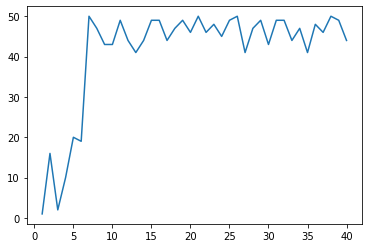

In [29]:
PORT = 8891

import requests
import json

import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Completely remove this
def set_range(from_n, to_n):
    # Make a request to set the random range to [1, 50]
    url = f'http://127.0.0.1:{PORT}/random_range'
    data = {
        'from_n': from_n,
        'to_n': to_n
    }
    response = requests.post(url, json=data)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Random Range Set Request 1: Asked [{data['from_n']} - {data['to_n']}], Got: [{jresponse['from_n']} - {jresponse['to_n']}]")

# Provided partially implemented: 
def get_next_point():
    # TODO: make a request to get another random integer and return the value of the random number
    url = f'http://127.0.0.1:{PORT}/random_number'
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        jresponse = response.json()
        print(f"Random Number Request {g1}: {jresponse['number']}")
        return jresponse['number']
    else:
        return None

# Provided already implemented: List holding the x values
data_x = []
# Provided already implemented: List holding the y values
data_y = []


# TODO: Set the range to [1, 10]
set_range(1, 20)

# Provided already implemented: make 20 iterations, getting a random number each time, and plotting a new plot with updated values.
url = f'http://127.0.0.1:{PORT}/random_number?count=40'
response = requests.get(url, stream=True)
x = 0
for line in response.iter_lines():
    if line:
        x += 1
        decoded_line = line.decode('utf-8')
        jresponse = json.loads(decoded_line)
        #print(f"Random Number Request: {jresponse['number']}")
        data_x.append(x)  # Add the current x to the list
        y = jresponse['number'] # Request a new random value and store in y
        data_y.append(y) # Add the current y to the list

        clear_output(wait=True) # Clear / remove whatever was already plotted before
        plt.plot(data_x, data_y) # Re-plot the data with the new added values in the list
#         plt.savefig(f"img_gen/Session04-01-requests-streaming-json-Section-3-{x:02}.png")
        plt.show() # Make sure to display the new plot, to make it visible
        if y == 19:
            print(data_y)
            # TODO: Set the range to [41, 10]    
            set_range(41, 50)
        

